Prachee Prasad, 381060

**DL LAB 1**

Implementing Feedforward neural networks in Python using Keras and TensorFlow

Problem: Customer Churning

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [4]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Show dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


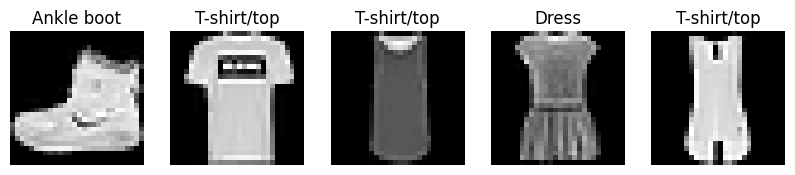

In [5]:
# Class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 5 images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [6]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     # 28x28 → 784
    keras.layers.Dense(128, activation='relu'),     # Hidden layer
    keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7812 - loss: 0.6396 - val_accuracy: 0.8498 - val_loss: 0.4129
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8594 - loss: 0.3951 - val_accuracy: 0.8693 - val_loss: 0.3571
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8754 - loss: 0.3440 - val_accuracy: 0.8707 - val_loss: 0.3454
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8846 - loss: 0.3157 - val_accuracy: 0.8640 - val_loss: 0.3742
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8922 - loss: 0.2973 - val_accuracy: 0.8798 - val_loss: 0.3224
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8950 - loss: 0.2828 - val_accuracy: 0.8843 - val_loss: 0.3294
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9027 - loss: 0.2690 - val_accuracy: 0.8803 - val_loss: 0.3244
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9052 - loss: 0.25

In [10]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8816 - loss: 0.3366

Test accuracy: 0.8815


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label: 2
Actual label: 2


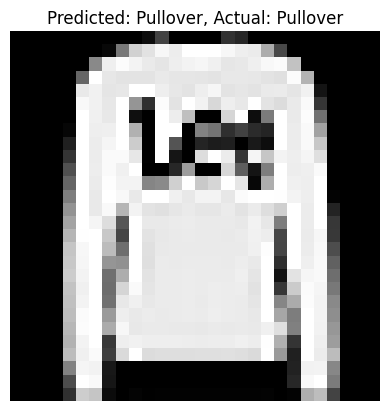

In [13]:
# Predict on test images
predictions = model.predict(x_test)

# View prediction for the first test image
print("Predicted label:", np.argmax(predictions[1]))
print("Actual label:", y_test[1])

# Show image
plt.imshow(x_test[1], cmap='gray')
plt.title(f"Predicted: {class_names[np.argmax(predictions[1])]}, Actual: {class_names[y_test[1]]}")
plt.axis('off')
plt.show()